<a href="https://colab.research.google.com/github/shriyashrestha525/AritificialNeuralNetwork/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/mydrive/MyDrive/ML/Churn_Modelling.csv')

In [ ]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6201,6202,15753079,Chidi,612,France,Male,41,5,0.00,3,0,0,151256.22,0
4361,4362,15592000,Calabresi,781,Germany,Female,48,9,82794.18,1,1,0,124720.68,1
1837,1838,15619343,Mahmood,561,France,Male,56,7,152759.00,2,1,0,133167.11,1
3757,3758,15679284,Aksenov,593,Spain,Female,45,6,79259.75,1,1,0,55347.28,0
2024,2025,15633043,Fedorova,545,Spain,Female,39,6,0.00,1,0,0,38410.74,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.shape

(10000, 14)

In [ ]:
x = data.iloc[:,3:13]
y = data['Exited']

In [ ]:
print(x.sample(5))

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3739          627    France  Female   32       1       0.00              1   
874           645    France  Female   38       5  101430.30              2   
5896          744     Spain    Male   30       1  128065.12              1   
4582          501    France    Male   37       4       0.00              2   
6543          814   Germany    Male   29       1  131968.57              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
3739          1               0        106851.70  
874           0               1          4400.32  
5896          1               0        121525.48  
4582          0               0         12470.30  
6543          1               1        147693.92  


In [ ]:
y.sample(5)

2477    1
7769    0
3260    1
4752    0
7966    0
Name: Exited, dtype: int64

In [ ]:
geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)

In [ ]:
x = pd.concat([x, geography, gender], axis = 1)
x = x.drop(['Geography', 'Gender'], axis = 1)

In [ ]:
x.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
8323,712,30,6,0.00,2,1,0,152417.97,0,1,0
4512,666,51,2,148222.65,1,0,0,156953.54,0,0,1
4533,850,39,6,206014.94,2,0,1,42774.84,0,1,1
2452,734,29,0,139994.66,1,1,0,17744.72,0,0,0
7374,682,38,1,116520.28,1,1,1,49833.50,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.sample(5))
print(x_test.sample(5))
print(y_train.sample(5))

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
8856          774   26       5       0.00              2          1   
1982          667   28       6  165798.10              1          1   
8585          754   45       6       0.00              1          1   
8260          640   30       5   32197.64              1          0   
7187          552   38       9  134105.01              1          0   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
8856               1         64716.08        0      0     0  
1982               0        147090.90        0      0     1  
8585               0         73881.68        0      0     0  
8260               1        141446.01        1      0     0  
7187               0         57850.10        0      0     0  
      CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
2114          732   33       8      0.0              1          1   
2001          661   27       3      0.0              2         

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
#initialize ANN
classifier = Sequential()

In [ ]:
#input layer and first hidden layer
classifier.add(Dense(units = 6, activation='relu',kernel_initializer = 'he_uniform', input_dim = 11))

In [ ]:
#second hidden layer
classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'he_uniform'))

In [ ]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model = classifier.fit(x_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 15318.3105 - accuracy: 0.5634 - val_loss: 1732.1068 - val_accuracy: 0.6763
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 629.2479 - accuracy: 0.6837 - val_loss: 47.1018 - val_accuracy: 0.5335
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 61.9382 - accuracy: 0.6734 - val_loss: 168.5880 - val_accuracy: 0.2378
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 54.6026 - accuracy: 0.6624 - val_loss: 77.9875 - val_accuracy: 0.7864
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 55.6611 - accuracy: 0.6820 - val_loss: 68.6190 - val_accuracy: 0.7940
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 61.3996 - accuracy: 0.6693 - val_loss: 30.0769 - val_accuracy: 0.6600
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 48.9368 - accuracy: 0.6878 - val_loss: 126.3073 

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.5535


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


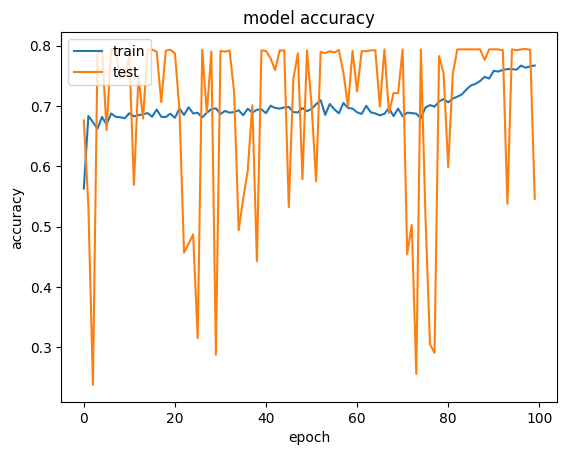

In [ ]:
import matplotlib.pyplot as plt
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

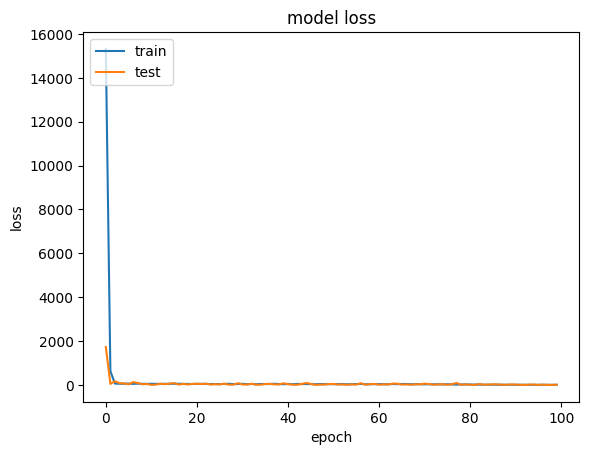

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()